## Statistical Analysis
### Getting the endmember spectrum of soil carbon

Exercise for Xinyi: Find the F's and A's for the false dataset (the I's and partial A's) that I produced for you.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

"I" represented the reflectance spectra of soil from the RaCA dataset.

Let's load a fake RaCA dataset here for now and try to learn about it.

In [30]:
def loadRaCADataset() :
    # load the test dataset that Evan sent
    data=np.load('falseDataset_Exercise1_blinded.npz')
    return data['As'], data['Is'], data['Xaxis']

    #return np.zeros([NPoints,MSpectra])

In [31]:
Adata,Idata,Xaxis = loadRaCADataset()
NPoints,MSpectra = Idata.shape
KEndmembers = 4 # I'm giving you this one

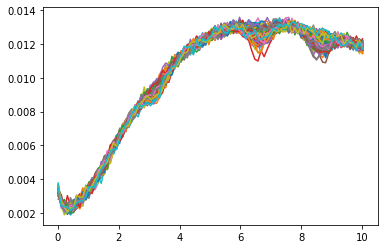

In [44]:
plt.plot(Xaxis, Idata.T)
plt.show()

"F" represented the endmember pure reflectance spectra from the ASD spectrometer. 

In [21]:
F = np.zeros([KEndmembers,MSpectra])

"A" represented the endmember number abundances from the ASD spectrometer.

In [22]:
A = np.zeros([KEndmembers,NPoints])

"Ihat" represented our estimates of the data given F and A.

In [23]:
def computeModel(tF, tA) :
    return np.dot(A.T,F)

Ihat = computeModel(F,A)

"E" represented the error of our estimates to the RaCA data in I.

In [24]:
def computeL2Error(I,Ih) :
    return np.sum(np.dot((I-Ih),(I-Ih).T))

E = computeL2Error(Idata,Ihat)

We want E to be as small as possible, as a function of our input parameters in F and A.

Exercise for Xinyi: Implement gradient descent assuming F and A contain all of our model parameters.

In [27]:
learningRate = 0.001

def computeGradient(tI, tA, tF, tLearningRate) :
    # return gradient of E w.r.t. elements of A and F
    return np.zeros([KEndmembers,NPoints]), np.zeros([KEndmembers,MSpectra])

def minimizeError(tI, tA, tF, tLearningRate, nEpochs) : 
    for i in range(nEpochs) :
        dA, dF = computeGradient(tI, tA, tF, tLearningRate)
        tA = tA - tLearningRate * dA
        tF = tF - tLearningRate * dF

Down the road: We will implement an AdamOptimizer to do gradient descent for us. 